In [41]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
df0=pd.read_csv('2021.csv',engine='python')
df1=df0[['Country name','Happiness score', 'Freedom to make life choices', 'Social support']]
df2 = pd.read_csv('CPI 2021 Score.csv',engine='python')
df3=pd.read_csv('happyscore_income.csv',engine='python')
df4=df3[['country','avg_satisfaction', 'GDP', 'avg_income']]

In [43]:
df5= pd.merge(left = df1, right = df2,how= 'inner',left_on='Country name', right_on='Country')
df5.drop(['Country'],axis=1, inplace=True)

In [44]:
df6= pd.merge(left = df5, right = df4,how= 'inner',left_on='Country name', right_on='country')
df6.drop(['country'],axis=1, inplace=True)
df6.head()

,Country name,Happiness score,Freedom to make life choices,Social support,CPI 2021 Score,avg_satisfaction,GDP,avg_income
0,Finland,7.842,0.949,0.954,88.0,7.9,1.29025,17310.195
1,Denmark,7.620,0.946,0.954,88.0,8.4,1.32548,17496.510
2,Switzerland,7.571,0.919,0.942,84.0,8.0,1.39651,23400.040
3,Iceland,7.554,0.955,0.983,74.0,8.1,1.30232,18828.345
4,Netherlands,7.464,0.913,0.942,82.0,7.6,1.32944,18234.435


In [45]:
start = time.time()

x = df6[['Freedom to make life choices', 'Social support','CPI  2021 Score','avg_satisfaction', 'GDP', 'avg_income']]
y = df6[['Happiness score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

print(mlr.score(x_train, y_train))
print("runtime :", time.time() - start)  

0.8441995656240189
runtime : 0.019191741943359375


In [46]:
feature_values = [[0.95, 0.95, 90, 9, 1.5,20000]]
predict = mlr.predict(feature_values)
print(predict)

[[7.7779057]]


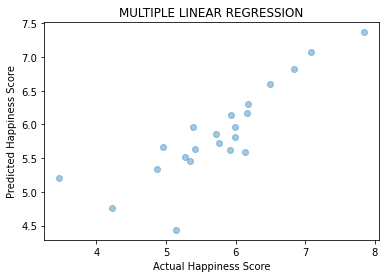

In [47]:
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

## Comparing with non-feature seleciton

In [48]:
df7= pd.merge(left = df0, right = df2,how= 'inner',left_on='Country name', right_on='Country')
df7.drop(['Country'],axis=1, inplace=True)
df8= pd.merge(left = df7, right = df3,how= 'inner',left_on='Country name', right_on='country')
df8.drop(['country'],axis=1, inplace=True)

In [49]:
df8.head()

,Country name,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,70.0,7.9,1.53,17310.195,14962.560,27.72375,'Western Europe',7.406,1.29025,Finland
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,74.0,8.4,1.53,17496.510,15630.885,28.15500,'Western Europe',7.527,1.32548,Denmark
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,70.0,8.0,1.62,23400.040,19442.920,32.93000,'Western Europe',7.587,1.39651,Switzerland
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,71.0,8.1,1.64,18828.345,16179.315,28.78000,'Western Europe',7.561,1.30232,Iceland
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,69.0,7.6,1.38,18234.435,15880.545,29.27125,'Western Europe',7.378,1.32944,Netherlands


In [51]:
start = time.time()

x1 = df8[['Standard error of ladder score','upperwhisker', 'lowerwhisker', 'Logged GDP per capita','Social support',
          'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption',
          'Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support',
          'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity',
          'Explained by: Perceptions of corruption','Dystopia + residual','CPI  2021 Score','adjusted_satisfaction',
          'avg_satisfaction','std_satisfaction','avg_income','median_income','income_inequality','GDP']]
y1 = df8[['Happiness score']]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x1_train, y1_train)

print(mlr.score(x1_train, y1_train))
print("runtime :", time.time() - start)

0.9999999126914741
runtime : 0.027480363845825195
